<a href="https://colab.research.google.com/github/JeremiahKamama/Spacy-Analysis/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import spacy
import string
import re

from spacy.lang.en import English
from spacy.tokens import Doc
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.tokenizer import Tokenizer

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud



In [2]:

nlp = spacy.load("en_core_web_sm", disable=['ner', 'parser', 'tagger'])




In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
imdb = pd.read_csv('/content/drive/MyDrive/data/IMDB.csv')

imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


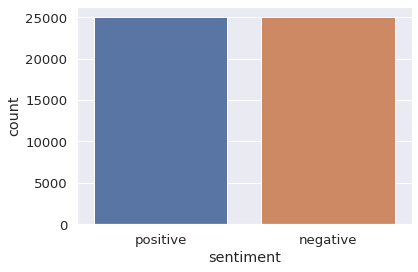

In [5]:
sns.set(style = 'darkgrid', font_scale = 1.2)
sns.countplot(imdb.sentiment)

In [6]:
imdb.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
imdb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
imdb.sentiment.replace("positive", 1 , inplace= True)
imdb.sentiment.replace("negative", 0, inplace= True)
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [9]:
miss_val = imdb.isnull().sum()

miss_val[0:10]

review       0
sentiment    0
dtype: int64

In [10]:
stopwords = list(STOP_WORDS)
print(stopwords)

['wherein', "'ll", 'everywhere', 'most', 'any', 'during', 'else', 're', 'still', 'yours', 'used', 'this', 'anyone', 'part', 'however', 'nine', 'perhaps', 'out', 'their', 'once', 'only', 'sometimes', 'above', 'well', 'throughout', 'neither', 'thru', 'several', 'latterly', 'hence', 'never', 'please', 'thereafter', 'whereby', 'upon', 'fifty', 'yourselves', 'these', 'former', 'while', 'enough', 'alone', 'amongst', 'across', 'since', "'d", 'the', 'elsewhere', 'under', 'all', 'ca', 'whenever', 'n’t', 'show', 'much', 'although', 'about', 'either', 'nowhere', 'four', 'herself', 'empty', 'whither', 'it', '‘s', 'over', 'of', 'indeed', 'moreover', "'ve", 'be', 'n‘t', 'seemed', 'which', 'through', 'then', 'various', 'with', 'anywhere', 'whom', 'somehow', 'by', 'hereby', 'whereupon', 'has', 'namely', 'already', 'your', 'call', 'hereafter', 'between', 'get', 'same', 'rather', 'wherever', '’s', 'last', 'become', 'into', 'whoever', '’ll', 'did', 'further', 'twenty', 'hers', "'m", 'could', 'put', 'were

In [11]:
punct = string.punctuation
print(punct)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [12]:
 def my_tokenizer(sentence):
  doc = nlp(sentence)
  tokens =[]

  for token in doc:
    if token.lemma_ != '-PRON-':
      temp = token.lemma_.lower().strip()
    else:
      temp = token.lower_
    tokens.append(temp)

  clean_tokens = []

  for token in tokens:
    if token not in punct:
      clean_tokens.append(token)
      
  return clean_tokens

In [50]:
text = "Our private lives have become a public commodity. Today, the business model of the web is to provide free services in exchange for personal data. Web services then sell this data. The user is not given a choice and is instead forced to give up their data in exchange for the services they want, and often in exchange for nothing, at the cost of personal privacy."
print(text)

Our private lives have become a public commodity. Today, the business model of the web is to provide free services in exchange for personal data. Web services then sell this data. The user is not given a choice and is instead forced to give up their data in exchange for the services they want, and often in exchange for nothing, at the cost of personal privacy.


In [51]:
doc = nlp(text)
print(doc)

Our private lives have become a public commodity. Today, the business model of the web is to provide free services in exchange for personal data. Web services then sell this data. The user is not given a choice and is instead forced to give up their data in exchange for the services they want, and often in exchange for nothing, at the cost of personal privacy.


In [52]:
words = [word.text for word in doc]
print(words)

['Our', 'private', 'lives', 'have', 'become', 'a', 'public', 'commodity', '.', 'Today', ',', 'the', 'business', 'model', 'of', 'the', 'web', 'is', 'to', 'provide', 'free', 'services', 'in', 'exchange', 'for', 'personal', 'data', '.', 'Web', 'services', 'then', 'sell', 'this', 'data', '.', 'The', 'user', 'is', 'not', 'given', 'a', 'choice', 'and', 'is', 'instead', 'forced', 'to', 'give', 'up', 'their', 'data', 'in', 'exchange', 'for', 'the', 'services', 'they', 'want', ',', 'and', 'often', 'in', 'exchange', 'for', 'nothing', ',', 'at', 'the', 'cost', 'of', 'personal', 'privacy', '.']


In [53]:
for token in doc:
  if not token.is_stop:
    print(token)

private
lives
public
commodity
.
Today
,
business
model
web
provide
free
services
exchange
personal
data
.
Web
services
sell
data
.
user
given
choice
instead
forced
data
exchange
services
want
,
exchange
,
cost
personal
privacy
.


In [54]:
for token in doc:
  print(token, token.lemma_)

Our Our
private private
lives live
have have
become become
a a
public public
commodity commodity
. .
Today Today
, ,
the the
business business
model model
of of
the the
web web
is be
to to
provide provide
free free
services service
in in
exchange exchange
for for
personal personal
data datum
. .
Web Web
services service
then then
sell sell
this this
data datum
. .
The The
user user
is be
not not
given give
a a
choice choice
and and
is be
instead instead
forced force
to to
give give
up up
their their
data datum
in in
exchange exchange
for for
the the
services service
they they
want want
, ,
and and
often often
in in
exchange exchange
for for
nothing nothing
, ,
at at
the the
cost cost
of of
personal personal
privacy privacy
. .


In [68]:
sample = "In recent years, new regulations such as the European Union’s General Data Protection Regulation (GDPR) and the California Consumer Privacy Act (CCPA) have been enacted"
tokens = nlp(sample)

In [70]:
print(tokens.text, tokens.vector[:3], tokens.vector_norm) #just only first three conmponents of vector 

for token in tokens:
    print(token.text, token.vector[:3], token.vector_norm)

In recent years, new regulations such as the European Union’s General Data Protection Regulation (GDPR) and the California Consumer Privacy Act (CCPA) have been enacted [] 0
In [] 0.0
recent [] 0.0
years [] 0.0
, [] 0.0
new [] 0.0
regulations [] 0.0
such [] 0.0
as [] 0.0
the [] 0.0
European [] 0.0
Union [] 0.0
’s [] 0.0
General [] 0.0
Data [] 0.0
Protection [] 0.0
Regulation [] 0.0
( [] 0.0
GDPR [] 0.0
) [] 0.0
and [] 0.0
the [] 0.0
California [] 0.0
Consumer [] 0.0
Privacy [] 0.0
Act [] 0.0
( [] 0.0
CCPA [] 0.0
) [] 0.0
have [] 0.0
been [] 0.0
enacted [] 0.0


In [69]:
for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

In False 0.0 True
recent False 0.0 True
years False 0.0 True
, False 0.0 True
new False 0.0 True
regulations False 0.0 True
such False 0.0 True
as False 0.0 True
the False 0.0 True
European False 0.0 True
Union False 0.0 True
’s False 0.0 True
General False 0.0 True
Data False 0.0 True
Protection False 0.0 True
Regulation False 0.0 True
( False 0.0 True
GDPR False 0.0 True
) False 0.0 True
and False 0.0 True
the False 0.0 True
California False 0.0 True
Consumer False 0.0 True
Privacy False 0.0 True
Act False 0.0 True
( False 0.0 True
CCPA False 0.0 True
) False 0.0 True
have False 0.0 True
been False 0.0 True
enacted False 0.0 True


In [16]:
my_tokenizer(sentence)

['i',
 'think',
 'this',
 'be',
 'a',
 'wonderful',
 'way',
 'to',
 'spend',
 'time',
 'on',
 'a',
 'too',
 'hot',
 'summer',
 'weekend',
 'sit',
 'in',
 'the',
 'air',
 'condition',
 'theater',
 'and',
 'watch',
 'a',
 'light',
 'hearted',
 'comedy',
 'the',
 'plot',
 'be',
 'simplistic',
 'but',
 'the',
 'dialogue',
 'be',
 'witty',
 'and',
 'the',
 'character',
 'be',
 'likable',
 'even',
 'the',
 'good',
 'bread',
 'suspect',
 'serial',
 'killer',
 'while',
 'some',
 'may',
 'be',
 'disappoint',
 'when',
 'they',
 'realize',
 'this',
 'be',
 'not',
 'match',
 'point',
 '2',
 'risk',
 'addiction',
 'i',
 'think',
 'it',
 'be',
 'proof',
 'that',
 'woody',
 'allen',
 'be',
 'still',
 'fully',
 'in',
 'control',
 'of',
 'the',
 'style',
 'many',
 'of',
 'us',
 'have',
 'grow',
 'to',
 'love.<br',
 '/><br',
 '/>this',
 'be',
 'the',
 'much',
 'i',
 'would',
 'laugh',
 'at',
 'one',
 'of',
 'woody',
 'have',
 'comedy',
 'in',
 'year',
 'dare',
 'i',
 'say',
 'a',
 'decade',
 'while',
 '

In [17]:
imdb['review'] = imdb['review'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))
imdb['review'] = imdb['review'].apply(lambda x: re.sub('[^a-zA-Z"]', ' ', x))
imdb['review'] = imdb['review'].apply(lambda x: x.lower())
imdb['review'] = imdb['review'].apply(lambda x: x.strip())


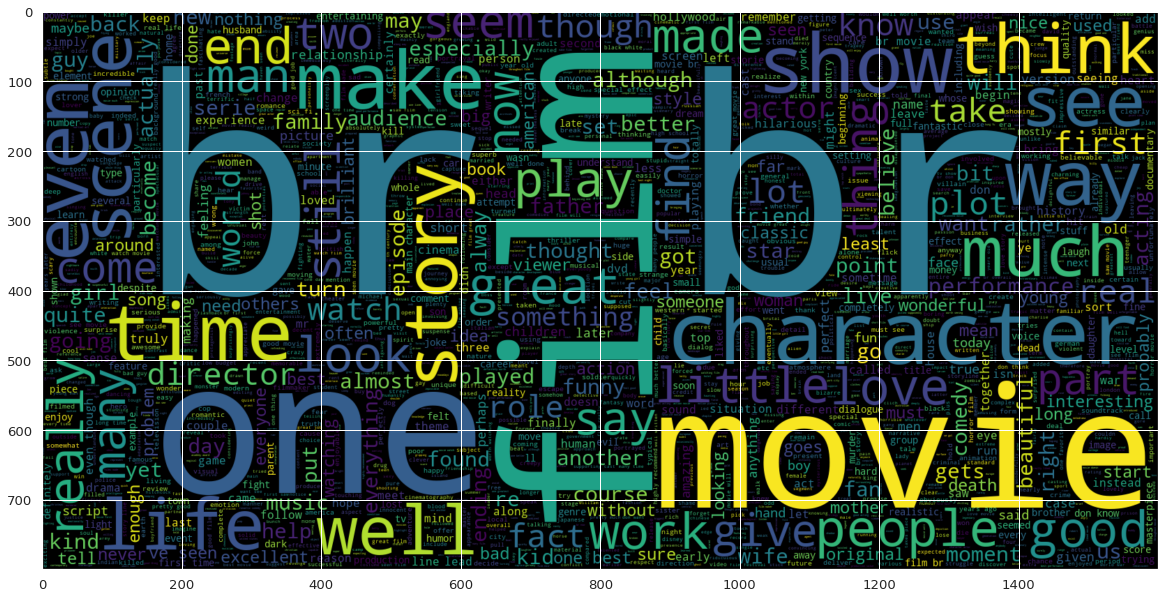

In [18]:
plt.figure(figsize = (20,20))
cloud = WordCloud(max_words= 2000, width= 1600,height= 800).generate("".join(imdb[imdb.sentiment == 1].review))
plt.imshow(cloud, interpolation='bilinear')

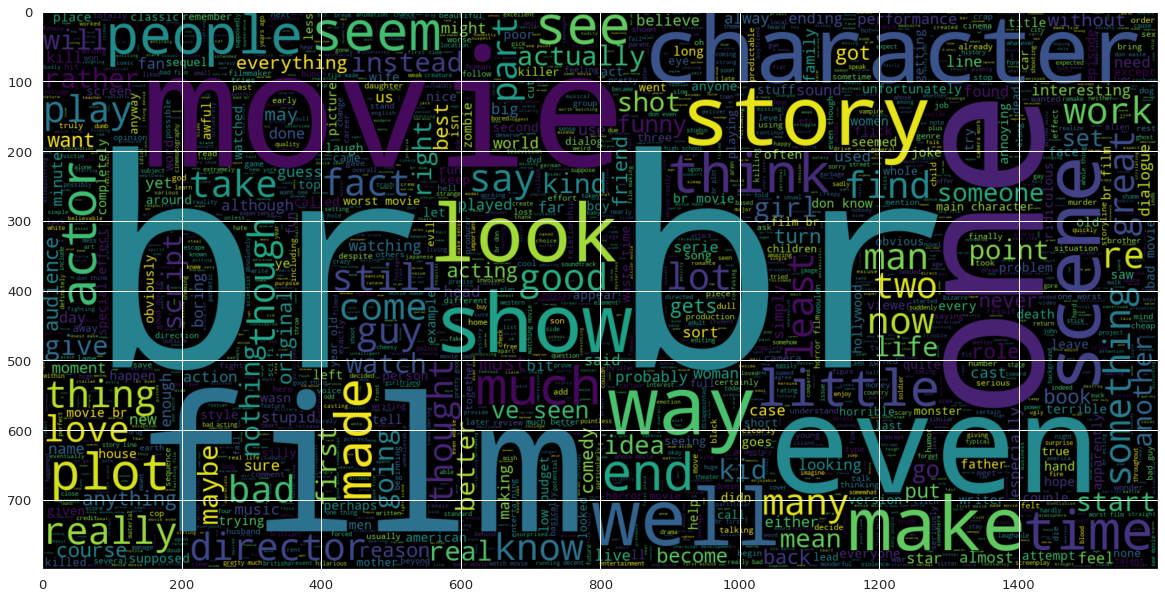

In [19]:
plt.figure(figsize = (20,20))
cloud = WordCloud(max_words= 2000, width= 1600,height= 800).generate("".join(imdb[imdb.sentiment == 0].review))
plt.imshow(cloud, interpolation='bilinear')

In [20]:
X = imdb['review']
y = imdb['sentiment']

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)



In [21]:
X_train.shape, X_test.shape, y_train.shape

((40000,), (10000,), (40000,))

In [22]:
tfvectorizer = TfidfVectorizer(tokenizer = my_tokenizer)

text_cf = Pipeline([('tfidf', tfvectorizer),('classifier',LinearSVC())])

In [24]:
text_cf.fit(X_train,y_train)

y_pred = text_cf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)

f1 = f1_score(y_test,y_pred)

print(f"F1 Score : {f1} and Accuracy Score {accuracy}")

F1 Score : 0.8968495436254785 and Accuracy Score 0.8949


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [26]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[4380  581]
 [ 470 4569]]


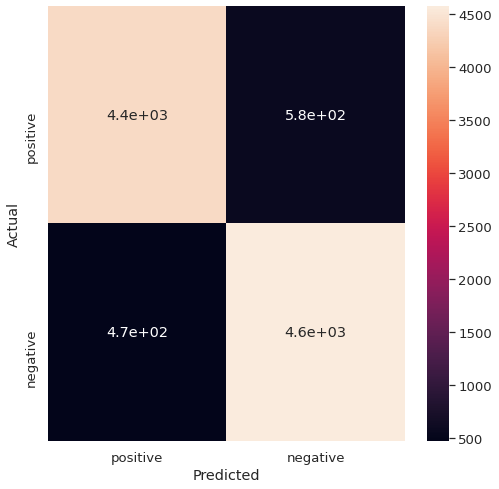

In [27]:
plt.figure(figsize = (8,8))
sns.heatmap(cm, annot=True, xticklabels = ['positive','negative'] , yticklabels = ['positive','negative']) 
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [28]:
review = imdb['review']

In [29]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding,LSTM
from tensorflow.python.keras.preprocessing.text import Tokenizer
from keras.optimizers import Adam
from keras.layers import Dropout
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import load_model

In [30]:
tokenizer = Tokenizer(num_words= 15000)
tokenizer.fit_on_texts(review)

In [31]:
train_tokens = tokenizer.texts_to_sequences(X_train)
test_tokens = tokenizer.texts_to_sequences(X_test)

In [32]:
num_tokens = [len(tokens) for tokens in train_tokens + test_tokens]
num_tokens = np.array(num_tokens)

In [33]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

567

In [34]:
train_pad = pad_sequences(train_tokens, maxlen=max_tokens)
test_pad = pad_sequences(test_tokens, maxlen=max_tokens)


In [35]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

def return_sentence(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text

In [36]:
print(return_sentence(train_pad[8]))

the people who are bad this film are those who don t understand film to begin with these are the people who love movie blockbusters and to any movie that doesn t star leonardo dicaprio wilder is a neat little film that may seem quirky and maybe even stupid at first but what it lacks in plot it more than makes up for in substance br br one thing in particular about the movie that impressed me was it s use of music which plays a large part those students of film music will notice how important music is in the movie both in and wilder s life and in the background wilder s theme s theme and wallace s theme are all heard in the opening sequence and it is funny how some of the lyrics play out for instance in the scene where the men are singing duke of earl is with wilder when the men sing something like she is my girl and then she goes over to wallace to give him something when the men sing the she will be my girl cleverly showing the tension between the two brothers there are all sorts of l

In [37]:
print(train_pad[8])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In [38]:
from keras import Sequential 
from keras.layers import Embedding,LSTM,Dense, Dropout

embedding_size=100

model = Sequential()

model.add(Embedding(input_dim=15000,output_dim=embedding_size,input_length=max_tokens,name="embedding_layer"))

model.add(LSTM(units=16,return_sequences= True))
model.add(Dropout(0.1))

model.add(LSTM(units=8,return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(units=4))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=1e-3)

model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])


In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 567, 100)          1500000   
_________________________________________________________________
lstm (LSTM)                  (None, 567, 16)           7488      
_________________________________________________________________
dropout (Dropout)            (None, 567, 16)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 567, 8)            800       
_________________________________________________________________
dropout_1 (Dropout)          (None, 567, 8)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 4)                 208       
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0

In [40]:
history = model.fit(train_pad, y_train, validation_split=0.3, epochs=5, batch_size=1000, shuffle=True, verbose = 1)

Epoch 1/5
28/28 [==============================] - 33s 309ms/step - loss: 0.6909 - accuracy: 0.5295 - val_loss: 0.6636 - val_accuracy: 0.6873
Epoch 2/5
28/28 [==============================] - 7s 243ms/step - loss: 0.6193 - accuracy: 0.7340 - val_loss: 0.4894 - val_accuracy: 0.8223
Epoch 3/5
28/28 [==============================] - 7s 245ms/step - loss: 0.4525 - accuracy: 0.8515 - val_loss: 0.4225 - val_accuracy: 0.8455
Epoch 4/5
28/28 [==============================] - 7s 242ms/step - loss: 0.3655 - accuracy: 0.8900 - val_loss: 0.3812 - val_accuracy: 0.8617
Epoch 5/5
28/28 [==============================] - 6s 230ms/step - loss: 0.3032 - accuracy: 0.9187 - val_loss: 0.3664 - val_accuracy: 0.8602


In [41]:
result = model.evaluate(test_pad, y_test)


313/313 [==============================] - 8s 23ms/step - loss: 0.3525 - accuracy: 0.8670


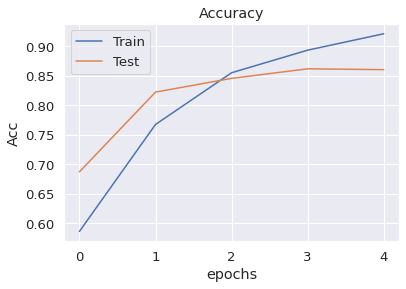

In [42]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()


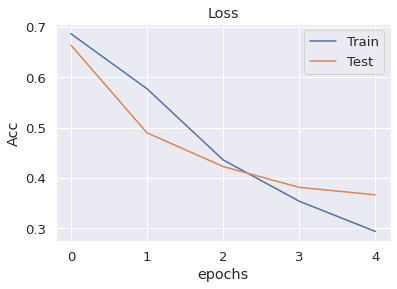

In [43]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()
